In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs as m_b

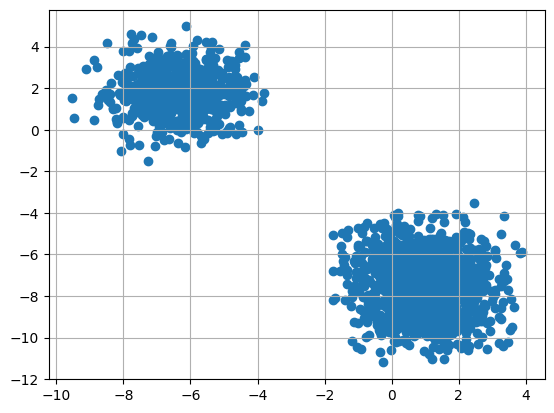

In [75]:
X,y = m_b(n_samples = 2000,n_features = 3,centers = 3,random_state = 10000)

fig = plt.figure(1)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [76]:
k = 3

clusters = {}
np.random.seed(1000)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([ 0.61435834, -1.53997223,  1.80113146]), 'points': []},
 1: {'center': array([-0.07123439,  1.48989814, -1.15066928]), 'points': []},
 2: {'center': array([-1.8371615 , -0.41122215, -1.06747121]), 'points': []}}

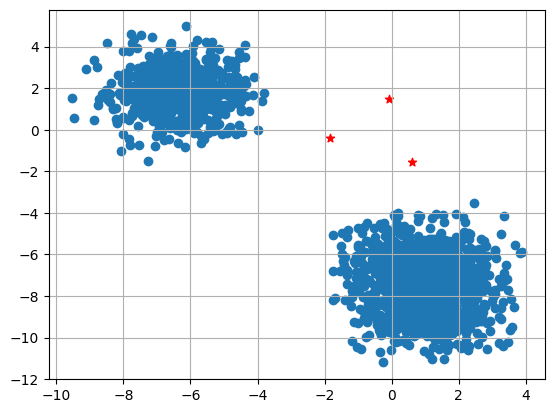

In [77]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [78]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [79]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


In [80]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [81]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


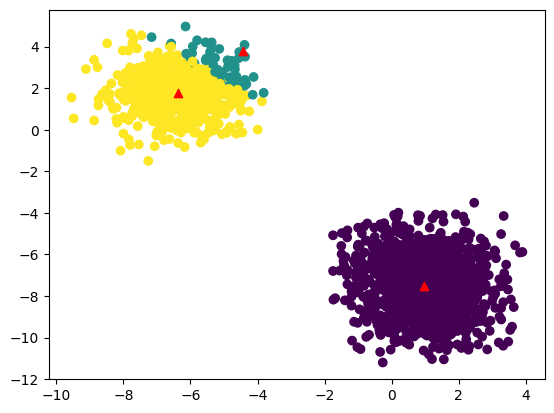

In [72]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()
